In order to build the models with tf-idf data use this notebook, in the previous one I put a lot of gibrish.

Just run the next cell and it will do the reading, merging, computing and spliting

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets as ds
import sklearn.model_selection as cv
import sklearn.neighbors as nb
import pandas as pd
import nltk
import re
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
from nltk import word_tokenize
from nltk.stem.snowball import EnglishStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets as ds
import sklearn.model_selection as cv
import sklearn.neighbors as nb
import pandas as pd
import nltk
import re
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
from collections import Counter
from nltk import word_tokenize, sent_tokenize
from nltk.stem.snowball import EnglishStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [9]:
# Funtion to get the tf_idf scores for a list of strings representing a title
# takes a list of strings as parameters
def pre_tfidf2(data):
    nr_pattern = re.compile(r'\b[+-]?\d*[.,]?\d+([eE][+-]?\d+)?\b')
    non_alphanum = re.compile(r'[^\w\d\-\+]')
    for i in range(len(data)):
        title = non_alphanum.sub(' ', data[i])
        data[i] = nr_pattern.sub('NUMBER_SPECIAL_TOKEN', title)
    vectorizer = TfidfVectorizer(stop_words=stopwords.words('english'), max_features=500)
    X = vectorizer.fit_transform(data)
    return X.toarray()

# reading the data
dt_true = pd.read_csv('clickbait_data.txt', sep='\n', names=['Title'])
dt_false = pd.read_csv('non_clickbait_data.txt', sep='\n', names=['Title'])
dt_true = dt_true.assign(Label = lambda x: True)
dt_false = dt_false.assign(Label = lambda x: False)

# merging the data
dt = pd.concat([dt_true, dt_false], ignore_index=True)

# computing tf-idf
X = pre_tfidf2(dt['Title'].to_list()) # tf_idf scores
y = dt['Label'] # labels


## At this point the variable `y` contains the TF_IDF scores and `X` hase the lables in the same order.

In [10]:
len(X), len(X[0]), len(y)

(32000, 500, 32000)

In [11]:
(X_train, X_test,  y_train, y_test) = cv.train_test_split(X, y, test_size=.3, random_state=1)

tuned_parameters = [
    {"kernel": ["rbf"], "C": [1, 10, 100, 1000]},
    {"kernel": ["linear"], "C": [1, 10, 100, 1000]},
]

# Create a kNN classifier object
SVM = GridSearchCV(SVC(), tuned_parameters,cv=5, verbose=0)
'''
SVM = SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
'''
# Train the classifier
grid_search = SVM.fit(X_train, y_train)

# Obtain accuracy score of learned classifier on test data
print(SVM.score(X_test, y_test))


0.8955208333333333


In [12]:
SVM.best_params_

{'C': 1, 'kernel': 'rbf'}

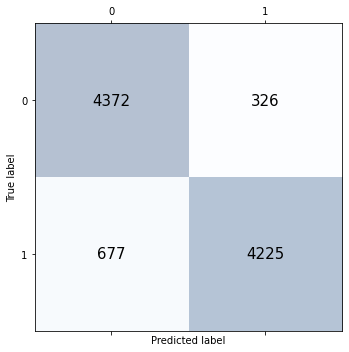

In [13]:
from sklearn.metrics import confusion_matrix

y_pred = SVM.predict(X_test)
confmat = sklearn.metrics.confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center',fontsize=15)

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.savefig('ConMatrix.png', dpi=600)
plt.show()

In [14]:
# Obtain Recall, Precision and F-Measure for each class
from sklearn import metrics

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.87      0.93      0.90      4698
        True       0.93      0.86      0.89      4902

    accuracy                           0.90      9600
   macro avg       0.90      0.90      0.90      9600
weighted avg       0.90      0.90      0.90      9600



In [15]:
def pre_tfidf2(data):
    nr_pattern = re.compile(r'\b[+-]?\d*[.,]?\d+([eE][+-]?\d+)?\b')
    non_alphanum = re.compile(r'[^\w\d\-\+]')
    for i in range(len(data)):
        title = non_alphanum.sub(' ', data[i])
        data[i] = nr_pattern.sub('NUMBER_SPECIAL_TOKEN', title)
    vectorizer = TfidfVectorizer(stop_words=stopwords.words('english'), max_features=500, binary = True)
    X = vectorizer.fit_transform(data)
    return X.toarray()

# reading the data
dt_true = pd.read_csv('clickbait_data.txt', sep='\n', names=['Title'])
dt_false = pd.read_csv('non_clickbait_data.txt', sep='\n', names=['Title'])
dt_true = dt_true.assign(Label = lambda x: True)
dt_false = dt_false.assign(Label = lambda x: False)

# merging the data
dt = pd.concat([dt_true, dt_false], ignore_index=True)

# computing tf-idf
X = pre_tfidf2(dt['Title'].to_list()) # tf_idf scores
y = dt['Label'] # labels

In [16]:
(X_train, X_test,  y_train, y_test) = cv.train_test_split(X, y, test_size=.3, random_state=1)

tuned_parameters = [
    {"kernel": ["rbf"], "C": [1, 10, 100, 1000]},
    {"kernel": ["linear"], "C": [1, 10, 100, 1000]},
]

# Create a kNN classifier object
SVM = GridSearchCV(SVC(), tuned_parameters,cv=5, verbose=0)

# Train the classifier
grid_search = SVM.fit(X_train, y_train)

# Obtain accuracy score of learned classifier on test data
print(SVM.score(X_test, y_test))


0.895


In [17]:
SVM.best_params_

{'C': 1, 'kernel': 'rbf'}

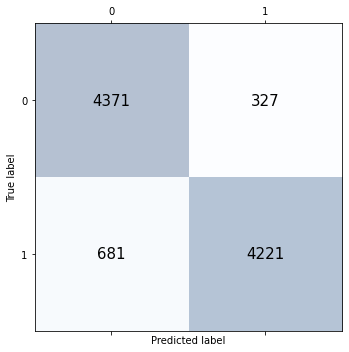

In [18]:
y_pred = SVM.predict(X_test)
confmat = sklearn.metrics.confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center',fontsize=15)

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.savefig('ConMatrix.png', dpi=600)
plt.show()

In [19]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.87      0.93      0.90      4698
        True       0.93      0.86      0.89      4902

    accuracy                           0.90      9600
   macro avg       0.90      0.90      0.89      9600
weighted avg       0.90      0.90      0.89      9600

